# The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments

##### input_dim: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
##### output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
##### input_length: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

In [2]:
# Sample
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']
# define class labels
labels = array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
# integer encode the documents 1 - 50
vocab_size = 50 # Tokenizer(num_words=50)
encoded_docs = [one_hot(d, vocab_size) for d in docs] # token.texts_to_sequences(train_text)

print('encoded_docs', encoded_docs, '\n')
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post') # sequence.pad_sequences(x_train_seq, maxlen=4)
print('padded_docs', '\n', padded_docs)



encoded_docs [[5, 45], [5, 10], [25, 9], [44, 10], [31], [17], [9, 9], [2, 5], [9, 10], [6, 13, 45, 17]] 

padded_docs 
 [[ 5 45  0  0]
 [ 5 10  0  0]
 [25  9  0  0]
 [44 10  0  0]
 [31  0  0  0]
 [17  0  0  0]
 [ 9  9  0  0]
 [ 2  5  0  0]
 [ 9 10  0  0]
 [ 6 13 45 17]]


In [3]:
# define the model
# vocab_size = 50
# max_length = 4
# dimensions = 8
# The output from the Embedding layer will be 4 vectors of 8 dimensions each, one for each word. 
# We flatten this to a one 32-element vector to pass on to the Dense output layer.
# parameter of Embedding = vocab_size(50) * dimensions(8)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())


# model.add(Embedding(output_dim=8,
#                     input_dim=50, 
#                     input_length=4))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 8)              400       
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
# fit the model
history = model.fit(padded_docs, labels, epochs=3000, verbose=0, validation_split=0.2)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=1)
print('Accuracy: %f' % (accuracy*100))

10/10 [==============================] - 0s 293us/step
Accuracy: 90.000004


In [5]:
for l in model.layers:
    print(l)
import numpy as np    
np.array(model.layers[0].get_weights()).reshape(50,8)

array([[-7.65648484e-02,  1.15480505e-01,  1.54343188e-01,
        -7.82107934e-02,  5.27035408e-02,  1.19238131e-01,
         1.91393355e-03,  1.45335823e-01],
       [ 4.66549471e-02,  3.59262004e-02,  6.08018646e-03,
         3.19707999e-03, -3.46541405e-02, -3.17942947e-02,
         3.44695225e-02,  2.16018688e-02],
       [ 9.12950933e-03,  9.87933353e-02, -3.88615429e-01,
         5.04248142e-01,  4.92353350e-01,  2.03084648e-01,
        -5.42740703e-01, -5.52355647e-02],
       [ 2.17548311e-02, -1.74946617e-02,  2.18973886e-02,
         3.41938399e-02, -1.69098526e-02, -4.05069627e-02,
        -2.47947574e-02, -3.14503573e-02],
       [-3.28334719e-02,  1.11246584e-02,  2.70771030e-02,
         2.72490736e-02, -2.89229602e-02,  2.74093747e-02,
        -4.26779315e-02,  2.26591360e-02],
       [ 8.73702839e-02,  6.68417364e-02,  5.76438427e-01,
        -4.23181593e-01, -3.35427046e-01, -1.76697858e-02,
         9.58044469e-01,  4.47356701e-01],
       [ 2.35049482e-02,  3.236511

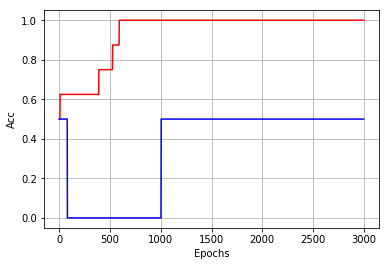

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(history.epoch)), history.history['acc'], color='red'  )
plt.plot(range(len(history.epoch)), history.history['val_acc'], color='blue'  )
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.grid()
plt.show()

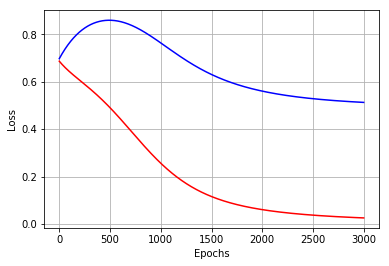

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(len(history.epoch)), history.history['loss'], color='red'  )
plt.plot(range(len(history.epoch)), history.history['val_loss'], color='blue'  )
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()